# **FolT Homework 8**


### Homework 8.1 (10 points)
In natural language processing, machine learning algorithms are widely used to automatically classify texts according
to a given task. Usually, a training and a development corpus are given in advance to prepare the classification system.
The training corpus is used to train a system, the development corpus is used to fine-tune the parameters. The testing
corpus is usually kept secret and is used only for the **final** evaluation of the systems. It must not be used for testing
during the development phase and for fine-tuning.

In the next task, you will create a part-of-speech tagger. The training, the development and the test set are given to you
in advance. Your tagger is supposed to be only trained on the training corpus and maybe on the development corpus.
You must not use the test corpus for training or fine-tuning your (hyper)parameters.


In [1]:
import nltk
from nltk.corpus import nps_chat, brown

In [2]:
def get_train_dev_test(tagged_parts):
  nr_parts = len(tagged_parts)
  #first 80% of the corpus
  train_parts = tagged_parts[:(nr_parts*8)//10] 
  # 80-90% of the corpus
  development_parts = tagged_parts[(nr_parts*8)//10:(nr_parts*9)//10] 
  # last 10% of the corpus
  test_parts = tagged_parts[((nr_parts*9)//10):] 
  print(nr_parts, ":", len(train_parts), len(development_parts), len(test_parts))
  return train_parts, development_parts, test_parts

In [3]:
train_posts, development_posts, test_posts = get_train_dev_test(
    nps_chat.tagged_posts(tagset='universal'))

train_sents, development_sents, test_sents = get_train_dev_test(
    brown.tagged_sents(tagset='universal'))

10567 : 8453 1057 1057
57340 : 45872 5734 5734


**Homework 8.1** (2 points, no programming needed)

Please explain why POS taggers are important for natural language processing and what kinds of downstream tasks
are enabled with POS tagging (give one example). What different strategies for implementing a POS tagger do you
already know and what are the pros and cons of these approaches (name at least two). Do you have suggestions how
they can be improved?

Answer each question in two or three sentences.



__Answer__
1. When processing a text, it is often useful to associate auxiliary information with each token e.g. we might want to label each token with its part of speech. 

Downstream tasks: POS labels could be used to derive the internal structure of a sentence. Moreover: "word sense" labels could be used to allow a questionn answering system to distinguish homonyms.

2. POS Tagging Strategies: 
a. Look up tagger

b. The regular expression taggers: + easy to implement -cannot cover all of the cases e.g. word ending with s are not neccessary a plural noun (peter's, anna's, ...)

The N-gram tagger: + the tag of the preceding word is taken into consideration - sparse data problem, however improvement can be done via combination of taggers e.g using backoff taggers.

**Homework 8.2** (8 points) 

Develop a part-of-speech tagger for texts in the chat domain and the brown corpus. You may explore several
directions such as handling rare tokens, handling special chat related phenomena like smilies, or using better and
more training data. You can try different things to improve the performance of the tagger on the training data, but be
careful not to overfit on the training data. Document your ideas and process well. 

Hints:

- You do not need to implement a tagger from scratch.
- You may train your tagger on more than one corpus.
- The corpora provided by NLTK offer a README in the corresponding folder, i.e. within the sub folders of ``nltk
\_data/corpora`` in your home folder (``Anwendungsdaten`` for Windows) you will find additional information.
- Use the universal tag set.
- Typical chat tokens like *’lol’* or *’:-)’* should be tagged as *’X’*, i.e. other.
- Read the paragraph *“Tagging Unknown Words”*. (See NLTK-book page chapter 5.5, page 206)
- use `import matplotlib.pyplot as plt` for the plotting


Collect your top 3 results on the development set for the brown and the chat corpus with the diffrerent hyperparameters and plot them. 
Evaluate your best tagger for brown and the chat corpus on the testset. Upload the code and report the accuracy as part of your submission. Use the
text field in the submission module to submit the final accuracy (just put a single number there for each corpus).



In [4]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt 
import numpy as np 
import itertools

tagset = ["VERB",
    "NOUN",
    "PRON",
    "ADJ",
    "ADV",
    "ADP",
    "CONJ",
    "DET",
    "NUM",
    "PRT",
    "X",
    "."
    ]

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Development set 

1. Chat Corpus with Bigram 

Accuracy: 0.8347877826259421
Confusion matrix, without normalization


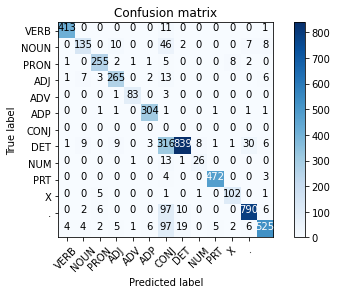

In [6]:
t0 = nltk.DefaultTagger("NN")        # handling unknown words with a default tagger
t1 = nltk.UnigramTagger(train_posts, backoff=t0)
t2 = nltk.BigramTagger(train_posts,backoff=t1)
print("Accuracy:", t2.evaluate(development_posts))

tagged_test_sentences = t2.tag_sents([[token for token,tag in sent] for sent in development_posts])
gold = [str(tag) for sentence in development_posts for token,tag in sentence]
pred = [str(tag) for sentence in tagged_test_sentences for token,tag in sentence]
cm = confusion_matrix(gold,pred)
plot_confusion_matrix(cm, tagset)

2. Chat Corpus with Trigram

Accuracy: 0.8337961126537089
Confusion matrix, without normalization


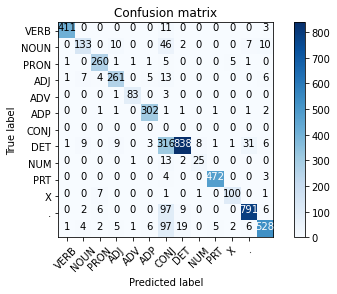

In [10]:
t0 = nltk.DefaultTagger("NN")
t1 = nltk.UnigramTagger(train_posts, backoff=t0)
t2 = nltk.BigramTagger(train_posts,backoff=t1)
t3 = nltk.TrigramTagger(train_posts,backoff=t2)
print("Accuracy:", t3.evaluate(development_posts))

tagged_test_sentences = t3.tag_sents([[token for token,tag in sent] for sent in development_posts])
gold = [str(tag) for sentence in development_posts for token,tag in sentence]
pred = [str(tag) for sentence in tagged_test_sentences for token,tag in sentence]
cm = confusion_matrix(gold, pred)
plot_confusion_matrix(cm, tagset)

Accuracy: 0.9172512310694044
Confusion matrix, without normalization


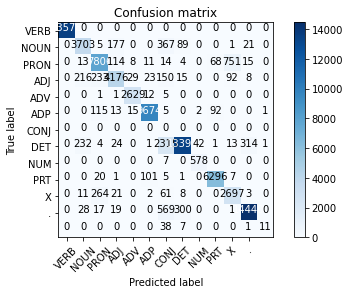

In [8]:
t0 = nltk.DefaultTagger("NN")
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents,backoff=t1)
print("Accuracy:", t2.evaluate(development_sents))

tagged_test_sentences = t2.tag_sents([[token for token,tag in sent] for sent in development_sents])
gold = [str(tag) for sentence in development_sents for token,tag in sentence]
pred = [str(tag) for sentence in tagged_test_sentences for token,tag in sentence]
cm = confusion_matrix(gold, pred)
plot_confusion_matrix(cm, tagset)

4. Brown Corpus with Trigram

Accuracy: 0.9161246864257178
Confusion matrix, without normalization


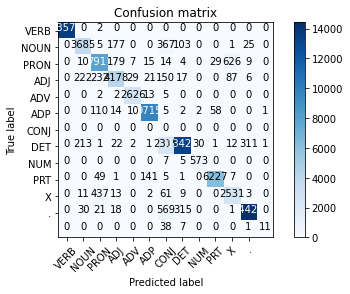

In [9]:
t0 = nltk.DefaultTagger("NN")
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents,backoff=t1)
t3 = nltk.TrigramTagger(train_sents,backoff=t2)
print("Accuracy:", t3.evaluate(development_sents))

tagged_test_sentences = t3.tag_sents([[token for token,tag in sent] for sent in development_sents])
gold = [str(tag) for sentence in development_sents for token,tag in sentence]
pred = [str(tag) for sentence in tagged_test_sentences for token,tag in sentence]
cm = confusion_matrix(gold, pred)
plot_confusion_matrix(cm, tagset)

### Test 

1. Chat Corpus Bigram

Accuracy: 0.8420658682634731
Confusion matrix, without normalization


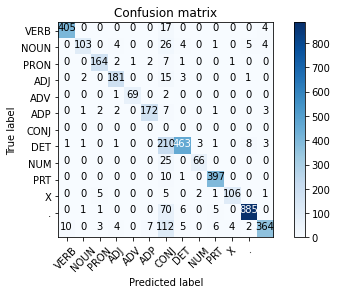

In [11]:
t0 = nltk.DefaultTagger("NN")
t1 = nltk.UnigramTagger(train_posts, backoff=t0)
t2 = nltk.BigramTagger(train_posts,backoff=t1)
print("Accuracy:", t2.evaluate(test_posts))

tagged_test_sentences = t2.tag_sents([[token for token,tag in sent] for sent in test_posts])
gold = [str(tag) for sentence in test_posts for token,tag in sentence]
pred = [str(tag) for sentence in tagged_test_sentences for token,tag in sentence]
cm = confusion_matrix(gold, pred)
plot_confusion_matrix(cm, tagset)

2. Brown Corpus with Bigram

Accuracy: 0.921376333270468
Confusion matrix, without normalization


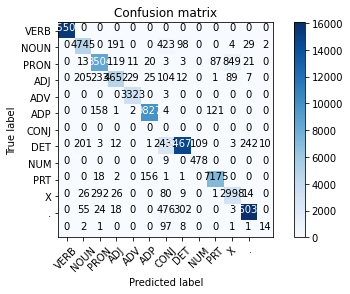

In [12]:
t0 = nltk.DefaultTagger("NN")
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents,backoff=t1)
print("Accuracy:", t2.evaluate(test_sents))

tagged_test_sentences = t2.tag_sents([[token for token,tag in sent] for sent in test_sents])
gold = [str(tag) for sentence in test_sents for token,tag in sentence]
pred = [str(tag) for sentence in tagged_test_sentences for token,tag in sentence]
cm = confusion_matrix(gold, pred)
plot_confusion_matrix(cm, tagset)